<a href="https://colab.research.google.com/github/AdityaPrasad275/Detecting-Depression-Through-Tweets/blob/main/Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Versions used : 

Library  | Version
-------------------|------------------
matplotlib | 3.6.2
pandas  | 1.3.5
seaborn | 0.11.2
nltk | 3.7

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
import os
os.chdir('MyDrive/Projects')
# !ls

In [3]:
import nltk 
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [4]:
pip install matplotlib --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import string
file_path='Sentiment Analysis Dataset 2.csv'
df=pd.read_csv(file_path,on_bad_lines='skip')

In [6]:
print(df.shape)
df.head()

(1578612, 4)


,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [7]:
#dropping unneccessary columns
df.drop(['SentimentSource','ItemID'],axis=1,inplace=True)

In [8]:
#Checking for null values (returns Boolean Value)
df.isnull().any()

Sentiment        False
SentimentText    False
dtype: bool

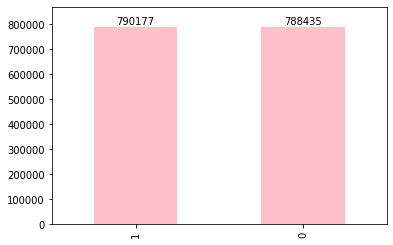

In [9]:
#We have nearly equal number of tweets that are of depressed and non-depressed nature
ax=df['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))
ax.bar_label(ax.containers[-1])
ax.margins(y=0.1)
plt.show()

In [10]:
#To remove spaces, may not be necessary
# df['SentimentText']=df['SentimentText'].str.replace(" ",'')

In [11]:
#Converting all tweets to lower case
df['SentimentText']=df['SentimentText'].str.lower()

#Removing Punctuation
df['SentimentText']=df['SentimentText'].str.translate(str.maketrans('', '', string.punctuation))

#Removing URL's
df['SentimentText'] = df['SentimentText'].str.replace('http\S+|www.\S+', '', case=False)

#Removing StopWords


In [12]:
df.head(-3)

,Sentiment,SentimentText
0,0,is so sad for my apl friend
1,0,i missed the new moon trailer
2,1,omg its already 730 o
3,0,omgaga im sooo im gunna cry ive be...
4,0,i think mi bf is cheating on me tt
...,...,...
1578604,1,zzzzno work tomorrowyayyy
1578605,1,zzzzz time tomorrow will be a busy day for ser...
1578606,0,zzzzz want to sleep but at sisters inlawss house
1578607,1,zzzzzz finally night tweeters


In [13]:
stop = stopwords.words('english')
# print(stop[:5])

df['Sentiment'] = df['Sentiment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


AttributeError: ignored

In [14]:
#Adding length column in dataframe
df['length']=df["SentimentText"].str.len()

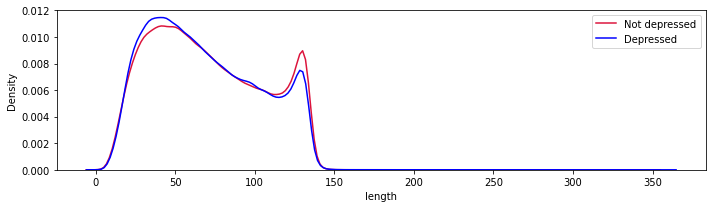

In [15]:
fig, ax = plt.subplots(figsize=(10, 3))
transparency=0.6
sns.kdeplot(df.loc[(df['Sentiment']==0), 
            'length'],
            color='crimson', label='Not depressed', ax=ax)

sns.kdeplot(df.loc[(df['Sentiment']==1), 
            'length'],
            color='blue', label='Depressed', ax=ax)
ax.legend()
plt.tight_layout()
plt.show()